In [14]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
from cartopy import crs as ccrs, feature as cfeature

#  Suppress warnings issued by Cartopy when downloading data files
warnings.filterwarnings('ignore')

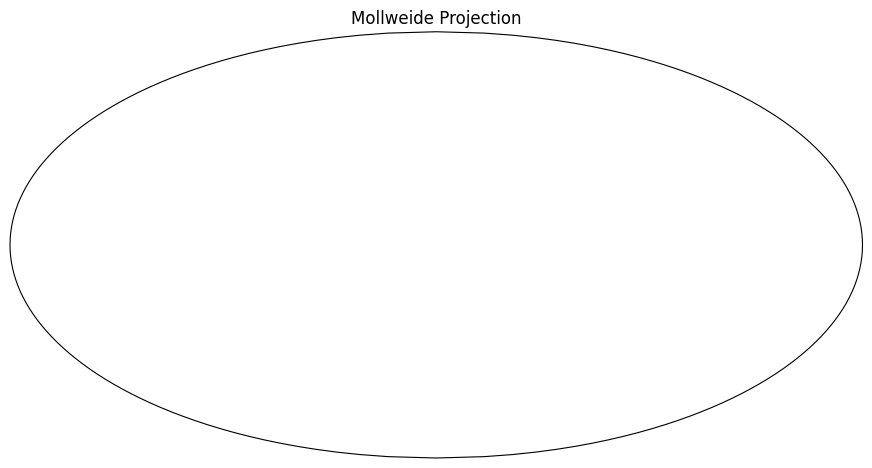

In [15]:
fig = plt.figure(figsize=(11, 8.5))
projMoll = ccrs.Mollweide(central_longitude=0)
ax = plt.subplot(1, 1, 1, projection=projMoll)
ax.set_title("Mollweide Projection")

plt.show()

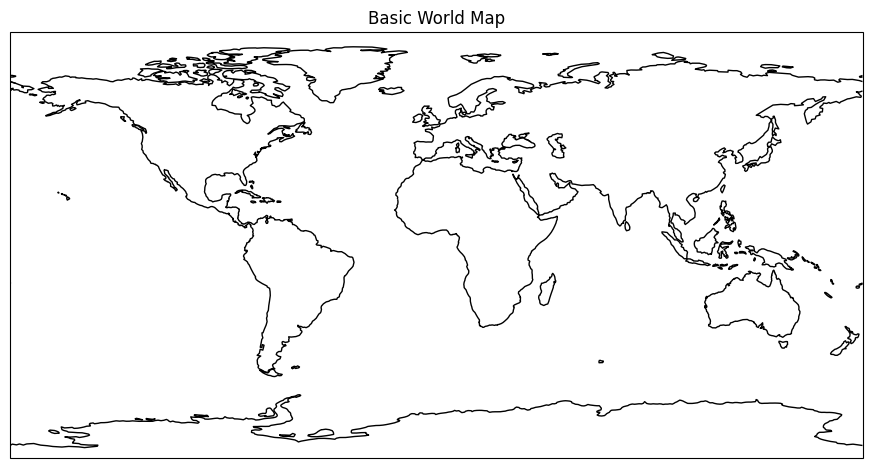

In [31]:
fig = plt.figure(figsize=(11, 8.5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_title("Basic World Map")
plt.show()

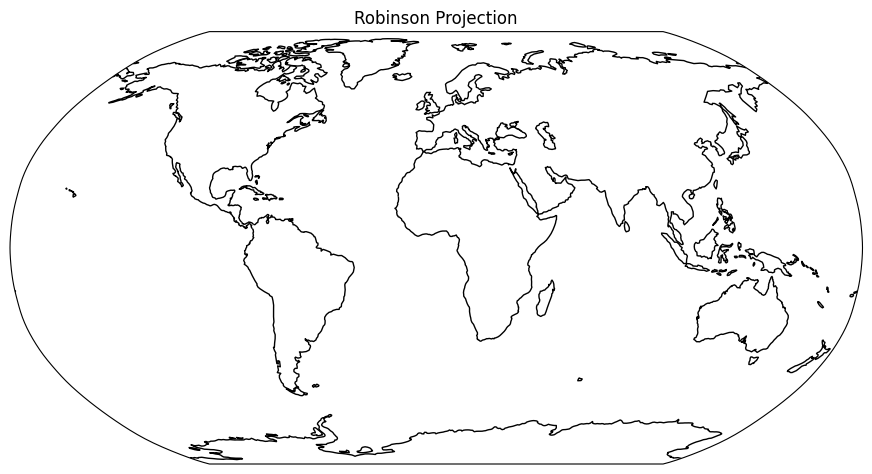

In [32]:
#Robinson projection
fig = plt.figure(figsize=(11, 8.5))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.set_title("Robinson Projection")

plt.show()

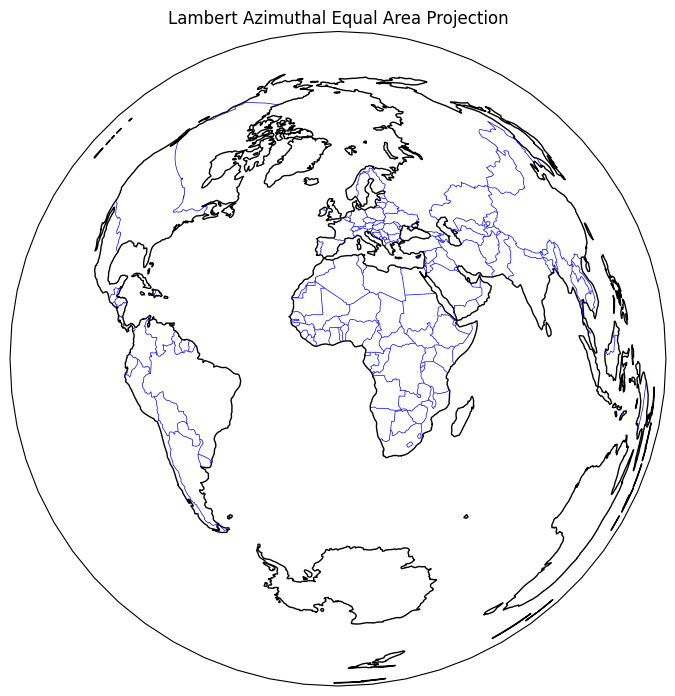

In [18]:
fig = plt.figure(figsize=(11, 8.5))
projLae = ccrs.LambertAzimuthalEqualArea(central_longitude=0.0, central_latitude=0.0)
ax = plt.subplot(1, 1, 1, projection=projLae)
ax.set_title("Lambert Azimuthal Equal Area Projection")
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='blue');

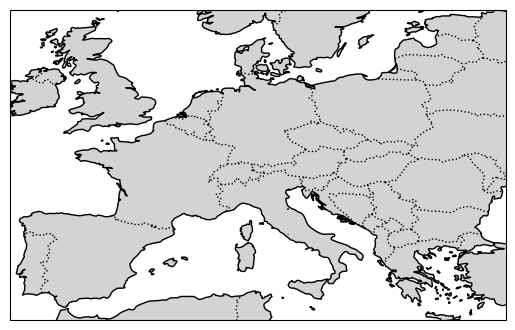

In [19]:

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-10, 30, 35, 60], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, color='lightgray')

plt.show()

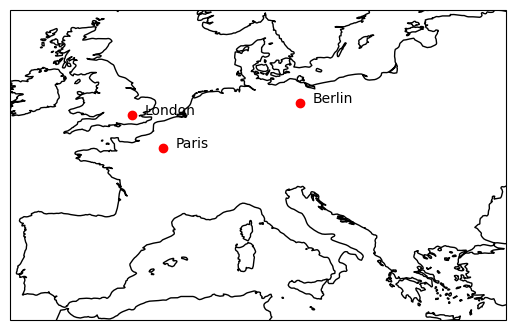

In [20]:

cities = {
    "London": [-0.1276, 51.5074],
    "Paris": [2.3522, 48.8566],
    "Berlin": [13.405, 52.52]
}


ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-10, 30, 35, 60], crs=ccrs.PlateCarree())

for city, (lon, lat) in cities.items():
    ax.plot(lon, lat, marker='o', color='red', transform=ccrs.PlateCarree())
    ax.text(lon + 1, lat, city, transform=ccrs.PlateCarree())

plt.show()

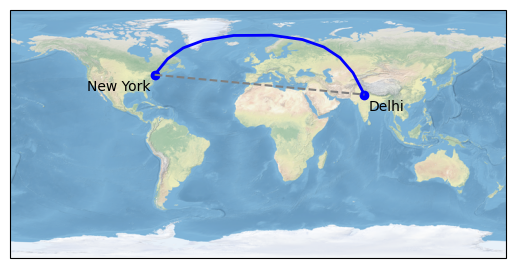

In [21]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='gray', linestyle='--',
         transform=ccrs.PlateCarree(),
         )

plt.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(delhi_lon + 3, delhi_lat - 12, 'Delhi',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.show()

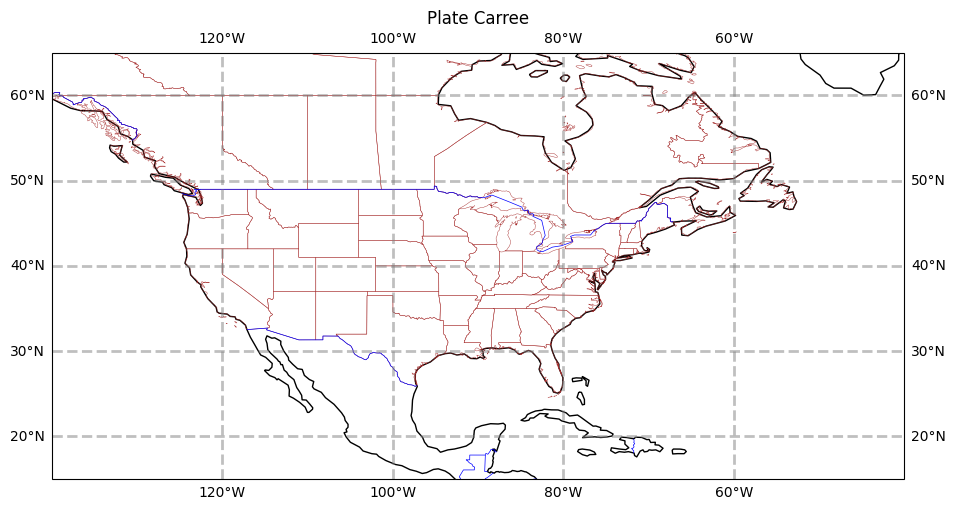

In [23]:
projPC = ccrs.PlateCarree()
lonW = -140
lonE = -40
latS = 15
latN = 65
cLat = (latN + latS) / 2
cLon = (lonW + lonE) / 2
res = '110m'
fig = plt.figure(figsize=(11, 8.5))
ax = plt.subplot(1, 1, 1, projection=projPC)
ax.set_title('Plate Carree')
gl = ax.gridlines(
    draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--'
)
ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
ax.coastlines(resolution=res, color='black')
ax.add_feature(cfeature.STATES, linewidth=0.3, edgecolor='brown')
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='blue')

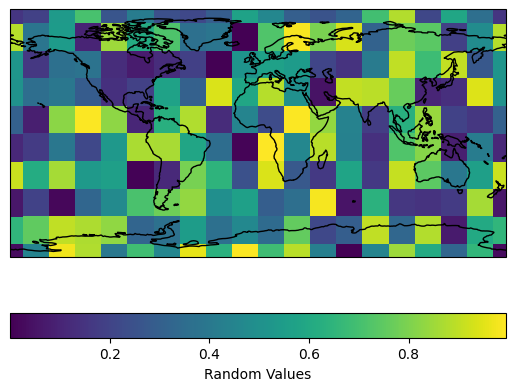

In [22]:
# Create synthetic raster data
data = np.random.rand(10, 20)
lon = np.linspace(-180, 180, data.shape[1])
lat = np.linspace(-90, 90, data.shape[0])


ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

mesh = ax.pcolormesh(lon, lat, data, transform=ccrs.PlateCarree(), cmap='viridis')
plt.colorbar(mesh, orientation='horizontal', label='Random Values')

plt.show()

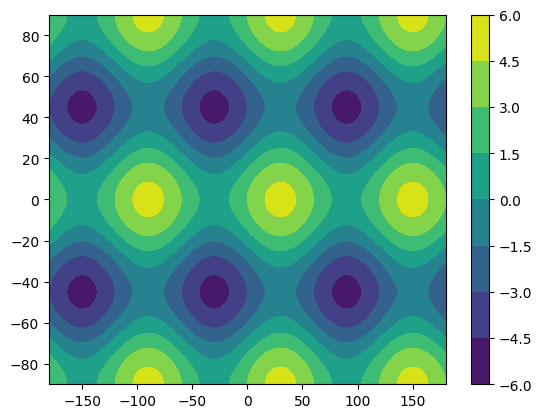

In [24]:
lon, lat = np.mgrid[-180:181, -90:91]
data = 2 * np.sin(3 * np.deg2rad(lon)) + 3 * np.cos(4 * np.deg2rad(lat))
plt.contourf(lon, lat, data)
plt.colorbar()

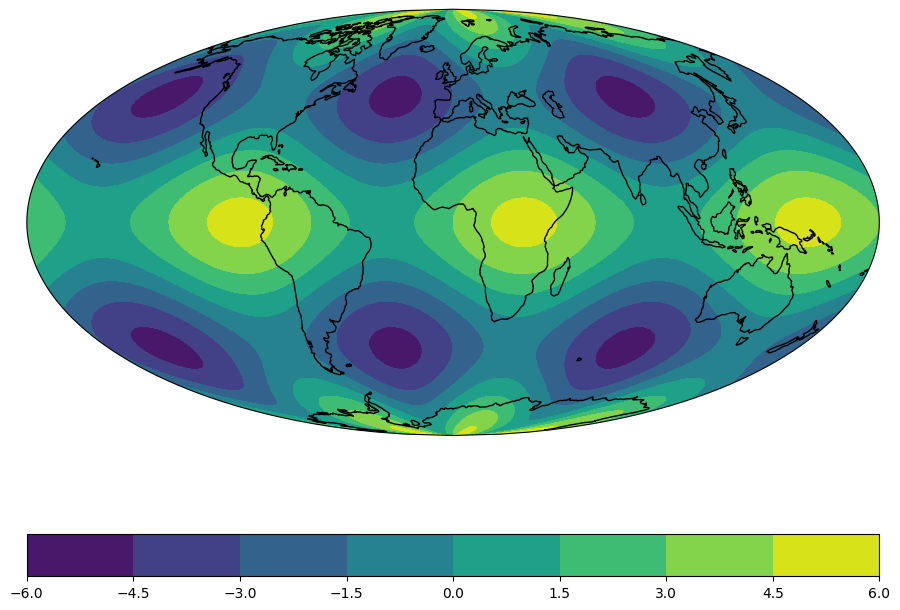

In [25]:
projMoll = ccrs.Mollweide(central_longitude=0)

fig = plt.figure(figsize=(11, 8.5))
ax = plt.subplot(1, 1, 1, projection=projMoll)
ax.coastlines()
dataplot = ax.contourf(lon, lat, data, transform=ccrs.PlateCarree())
plt.colorbar(dataplot, orientation='horizontal')

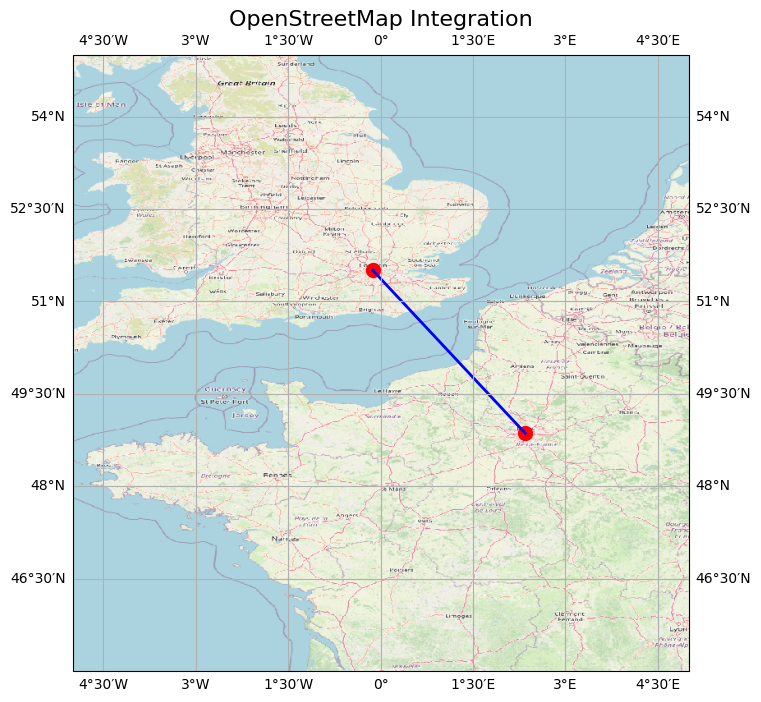

In [26]:
from cartopy.io.img_tiles import OSM

locations = {
    "London": {"lon": -0.1276, "lat": 51.5072},  # Longitude, Latitude
    "Paris": {"lon": 2.3522, "lat": 48.8566},
}

osm_tiles = OSM()
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=proj)
ax.add_image(osm_tiles, 7)

for city, coords in locations.items():
    ax.plot(
        coords["lon"], coords["lat"],
        marker='o', color='red', markersize=10,
        transform=proj,
        label=city
    )

lons = [locations["London"]["lon"], locations["Paris"]["lon"]]
lats = [locations["London"]["lat"], locations["Paris"]["lat"]]
ax.plot(lons, lats, color='blue', linewidth=2, transform=proj, label="Connection")

ax.set_extent([-5, 5, 45, 55], crs=proj)

ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
plt.title("OpenStreetMap Integration", fontsize=16)

plt.show()